In [670]:
#Machine learning HW
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [671]:
data = pd.read_csv("D:/UTD/Spring 20/Applied Machine Learning/Assignments/Assignment1/Dataset/sgemm_product.csv")
data.shape

(241600, 18)

In [389]:
#Creating a column which is the average of all the four runtimes
data["Avg_run"] = (data["Run1 (ms)"]+data["Run2 (ms)"]+data["Run3 (ms)"]+data["Run4 (ms)"])/4
data.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),Avg_run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81,118.6625


## Exploratory Data Analysis

In [390]:
# Checking for Null values
data.isnull().sum()

MWG          0
NWG          0
KWG          0
MDIMC        0
NDIMC        0
MDIMA        0
NDIMB        0
KWI          0
VWM          0
VWN          0
STRM         0
STRN         0
SA           0
SB           0
Run1 (ms)    0
Run2 (ms)    0
Run3 (ms)    0
Run4 (ms)    0
Avg_run      0
dtype: int64

#### We observe that we don't have any missing values in our dataset

In [391]:
data.describe()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),Avg_run
count,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000
mean,80.415364,80.415364,25.513113,13.935894,13.935894,17.371126,17.371126,5.000000,2.448609,2.448609,0.500000,0.500000,0.500000,0.500000,217.647852,217.579536,217.532756,217.527669,217.571953
std,42.469220,42.469220,7.855619,7.873662,7.873662,9.389418,9.389418,3.000006,1.953759,1.953759,0.500001,0.500001,0.500001,0.500001,369.012422,368.677309,368.655118,368.677413,368.750161
min,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13.290000,13.250000,13.360000,13.370000,13.317500
25%,32.000000,32.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.660000,40.710000,40.660000,40.640000,40.667500
50%,64.000000,64.000000,32.000000,8.000000,8.000000,16.000000,16.000000,5.000000,2.000000,2.000000,0.500000,0.500000,0.500000,0.500000,69.825000,69.930000,69.790000,69.820000,69.790000
75%,128.000000,128.000000,32.000000,16.000000,16.000000,32.000000,32.000000,8.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,228.530000,228.310000,228.320000,228.320000,228.387500
max,128.000000,128.000000,32.000000,32.000000,32.000000,32.000000,32.000000,8.000000,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,3339.630000,3375.420000,3397.080000,3361.710000,3341.507500


In [392]:
# Plotting a correlation matrix to understand the relation between various variables
corr = data.corr()
corr.style.background_gradient(cmap = "coolwarm").set_precision(3)

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),Avg_run
MWG,1,0.0006,0.0093,0.106,-0.00859,0.159,0.0149,1.48e-19,0.354,-0.000841,6.93e-21,1.39e-21,0,0,0.352,0.352,0.352,0.352,0.352
NWG,0.0006,1,0.0093,-0.00859,0.106,0.0149,0.159,8.57e-19,-0.000841,0.354,6.93e-21,1.39e-21,0,0,0.32,0.32,0.321,0.32,0.32
KWG,0.0093,0.0093,1,0.148,0.148,-0.0346,-0.0346,-1.81e-19,-0.012,-0.012,1.87e-21,0,0,0,0.0115,0.0111,0.0112,0.0111,0.0112
MDIMC,0.106,-0.00859,0.148,1,-0.21,0.197,0.0846,-3.18e-18,-0.134,0.0105,-1.12e-20,-3.74e-21,0,0,-0.221,-0.221,-0.221,-0.221,-0.221
NDIMC,-0.00859,0.106,0.148,-0.21,1,0.0846,0.197,-5.25e-18,0.0105,-0.134,-1.12e-20,-3.74e-21,0,0,-0.215,-0.215,-0.214,-0.215,-0.215
MDIMA,0.159,0.0149,-0.0346,0.197,0.0846,1,0.0881,-4.55e-18,-0.203,-0.019,1.57e-21,1.57e-21,0,0,-0.00708,-0.00705,-0.007,-0.00701,-0.00704
NDIMB,0.0149,0.159,-0.0346,0.0846,0.197,0.0881,1,-1.08e-17,-0.019,-0.203,1.57e-21,1.57e-21,0,0,-0.00875,-0.00872,-0.00866,-0.0087,-0.00871
KWI,1.48e-19,8.57e-19,-1.81e-19,-3.18e-18,-5.25e-18,-4.55e-18,-1.08e-17,1,-3.61e-16,-4.81e-16,0,0,0,0,0.0322,0.0327,0.0327,0.0327,0.0326
VWM,0.354,-0.000841,-0.012,-0.134,0.0105,-0.203,-0.019,-3.61e-16,1,0.00116,-1.41e-20,9.41e-22,0,0,0.164,0.164,0.164,0.164,0.164
VWN,-0.000841,0.354,-0.012,0.0105,-0.134,-0.019,-0.203,-4.81e-16,0.00116,1,-1.41e-20,9.41e-22,0,0,0.145,0.145,0.145,0.145,0.145


#### We observe that none of the variables are highly correlated to each other

In [393]:
data["Avg_run"] = data["Avg_run"]/1000
data.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),Avg_run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80,0.116370
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19,0.078705
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97,0.080565
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58,0.086638
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81,0.118663


In [394]:
# Dropping unneccessary columns
data = data.drop(columns = ['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)'])
data.shape

(241600, 15)

### Boxplot

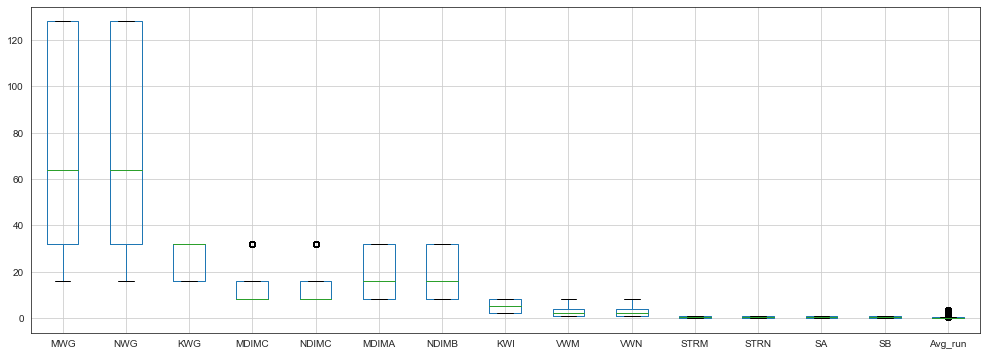

In [398]:
#data.plot(kind = 'box', figsize = (17,4), grid = 'True')
data.plot.box(grid = 'True', figsize = (17,6))

### Creating a data backup

In [399]:
# Creating a column for intercept in case of Linear Regression
data['intercept'] = 1
data.head(), data.shape

(   MWG  NWG  KWG  MDIMC  NDIMC  MDIMA  NDIMB  KWI  VWM  VWN  STRM  STRN  SA  \
 0   16   16   16      8      8      8      8    2    1    1     0     0   0   
 1   16   16   16      8      8      8      8    2    1    1     0     0   0   
 2   16   16   16      8      8      8      8    2    1    1     0     0   1   
 3   16   16   16      8      8      8      8    2    1    1     0     0   1   
 4   16   16   16      8      8      8      8    2    1    1     0     1   0   
 
    SB   Avg_run  intercept  
 0   0  0.116370          1  
 1   1  0.078705          1  
 2   0  0.080565          1  
 3   1  0.086638          1  
 4   0  0.118663          1  , (241600, 16))

In [400]:
# Reordering columns in runtime dataframe
data = data.reindex(columns= ['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM', 'VWN', 'STRM', 'STRN',
                                  'SA', 'SB', 'intercept', 'Avg_run'])
data.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,intercept,Avg_run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,1,0.116370
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,1,0.078705
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,1,0.080565
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,1,0.086638
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,1,0.118663


In [401]:
# Creating a copy of dataframe
df = data.copy()
df.head(), df.shape

(   MWG  NWG  KWG  MDIMC  NDIMC  MDIMA  NDIMB  KWI  VWM  VWN  STRM  STRN  SA  \
 0   16   16   16      8      8      8      8    2    1    1     0     0   0   
 1   16   16   16      8      8      8      8    2    1    1     0     0   0   
 2   16   16   16      8      8      8      8    2    1    1     0     0   1   
 3   16   16   16      8      8      8      8    2    1    1     0     0   1   
 4   16   16   16      8      8      8      8    2    1    1     0     1   0   
 
    SB  intercept   Avg_run  
 0   0          1  0.116370  
 1   1          1  0.078705  
 2   0          1  0.080565  
 3   1          1  0.086638  
 4   0          1  0.118663  , (241600, 16))

In [403]:
# Creating a matrix of independent variables
ind_data = np.array(data)
ind_data = ind_data[:, 0:15]
ind_data.shape

(241600, 15)

# Linear Regression

In [404]:
# Splitting the data into train and test dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(ind_data, data['Avg_run'], test_size = 0.3)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((169120, 15), (169120,), (72480, 15), (72480,))

In [405]:
y_train = np.array(y_train).reshape([-1,1])
y_test = np.array(y_test).reshape([-1,1])
y_train.shape, y_test.shape

((169120, 1), (72480, 1))

In [406]:
#Generating a random matrix
np.random.seed(123)
theta = np.random.rand(ind_data.shape[1],1)
theta[0:,]
theta.shape

(15, 1)

In [407]:
# Function for Normalization
from sklearn.preprocessing import StandardScaler
def standardization(x):
    stdscaler = StandardScaler()
    new_df = stdscaler.fit_transform(x)
    return new_df

In [21]:
'''import pandas as pd
from sklearn import preprocessing

cols = data.columns
data_normal = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
data_normal = min_max_scaler.fit_transform(data_normal)
data_normal = pd.DataFrame(data_normal, columns = cols)'''

In [408]:
x_train = standardization(x_train)
y_train = standardization(y_train)
x_test = standardization(x_test)
y_test = standardization(y_test)

In [409]:
def cost(x, y, theta):
    m = len(data.axes[0])
    theta1 = np.matmul(x, theta)
    cost = (1/(2*m))*sum(np.subtract(theta1, y)**2)
    return cost    

In [410]:
def gradient_descent_linear(x, y, theta, lr, iterations):
    m = len(data.axes[0])
    cost_hist = [0]*iterations
    for i in range(iterations):
        theta = theta - (lr/m)*np.matmul(x.T, ((np.matmul(x,theta))-y))
        cost_hist[i] = cost(x, y, theta)
        
    return (cost_hist, theta)    

Initial cost is:  [1.93459165] 

Optimal parameters are: 
 [[ 0.38331313]
 [ 0.35476355]
 [ 0.11067004]
 [-0.35748212]
 [-0.35064644]
 [ 0.02664959]
 [ 0.0267679 ]
 [ 0.03307982]
 [-0.00766684]
 [-0.01831859]
 [-0.01262313]
 [ 0.00151355]
 [ 0.05132519]
 [ 0.06555645]
 [ 0.39804426]] 

Final cost is:  [0.20712793]


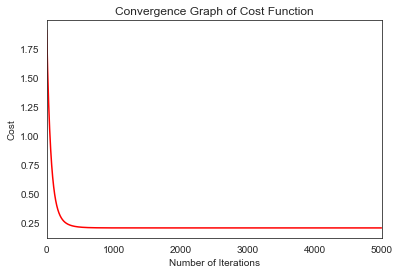

In [411]:
np.random.seed(123)
iterations = 5000
lr = 0.01

initial_cost = cost(x_train, y_train, theta)
print("Initial cost is: ", initial_cost, "\n")
(cost_hist, cost_theta) = gradient_descent_linear(x_train, y_train, theta, lr, iterations)
print("Optimal parameters are: \n", cost_theta, "\n")
print("Final cost is: ", cost_hist[-1])

plt.plot(range(len(cost_hist)), cost_hist, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.xlim([0,5000])
plt.show()

In [412]:
cost_hist[4999]

array([0.20712793])

In [413]:
def pred(x, y):
    val = x.dot(y)
    return val

final_pred_test = pred(x_test, cost_theta)

In [414]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import math
import sklearn.metrics as metrics

In [415]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train)
final_pred = regressor.predict(x_test)
error = final_pred-y_test
math.sqrt(sum(error*error)/len(error))

0.7708892598250859

In [416]:
def result(x, y):
    mean_ae=metrics.mean_absolute_error(x,y) 
    mse=metrics.mean_squared_error(x,y) 
    median_ae=metrics.median_absolute_error(x,y)
    r2=metrics.r2_score(x,y)
    print('R2 of the model: ', r2)
    print('Mean absolute error: ', mean_ae)
    print('Mean squared error: ', mse)
    print('Root mean squared error: ', np.sqrt(mse))

In [417]:
final_pred_train = pred(x_train, cost_theta)

In [418]:
result(y_test, final_pred_test)

R2 of the model:  0.4057297492133347
Mean absolute error:  0.4796264760696641
Mean squared error:  0.5942702507866653
Root mean squared error:  0.7708892597427113


In [419]:
result(y_train, final_pred_train)

R2 of the model:  0.4082059241746796
Mean absolute error:  0.4781242503821921
Mean squared error:  0.5917940758253204
Root mean squared error:  0.7692815322268697


## Logistic Regression

In [420]:
import statistics

In [421]:
# Calculating the median for Avg_run column
median_run = statistics.median(data["Avg_run"])
median_run

0.06979

In [422]:
# Replacing the Avg_run column in the dataset with a new column such that we have only 1,0 values for Logistic regression
df['Logistic_run'] = median_run
df['Avg_run'] = np.where(df['Avg_run'] >= df['Logistic_run'], 1, 0)
df = df.drop(['Logistic_run'], axis = 1)
df.head(2), df.shape

(   MWG  NWG  KWG  MDIMC  NDIMC  MDIMA  NDIMB  KWI  VWM  VWN  STRM  STRN  SA  \
 0   16   16   16      8      8      8      8    2    1    1     0     0   0   
 1   16   16   16      8      8      8      8    2    1    1     0     0   0   
 
    SB  intercept  Avg_run  
 0   0          1        1  
 1   1          1        1  , (241600, 16))

In [423]:
df1 = np.array(df)
df1 = df1[:,0:15]
df1.shape

(241600, 15)

In [424]:
Avg_run = df.iloc[:, 15]
Avg_run = np.array(Avg_run)
Avg_run = Avg_run.reshape([-1,1])

In [425]:
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(df1, Avg_run ,test_size = 0.3)
x_train_log.shape, x_test_log.shape, y_train_log.shape, y_test_log.shape

((169120, 15), (72480, 15), (169120, 1), (72480, 1))

In [426]:
type(x_train_log), type(x_test_log), type(y_train_log), type(y_test_log)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [427]:
x_train_log = standardization(x_train_log)
x_test_log = standardization(x_test_log)

In [428]:
np.random.seed(123)
n = np.size(x_train_log,1)
theta_log = np.random.rand(n,1)

type(theta_log)

numpy.ndarray

In [429]:
def sigmoid(var):
    return 1/(1 + np.exp(-var))

In [430]:
def cost_log(x, y, theta):
    m = len(y)
    h = sigmoid(x @ theta)
    epsilon = 1e-5
    cost = (-1/m)*(((y).T @ np.log(h + epsilon))+((1-y).T @ np.log(1-h + epsilon)))
    return cost

In [431]:
def gradient_descent(x, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        theta = theta - (learning_rate/m) * (x.T @ (sigmoid(x @ theta) - y)) 
        cost_history[i] = cost_log(x, y, theta)

    return (cost_history, theta)

In [432]:
def predict(x, theta):
    return np.round(sigmoid(x @ theta))

Initial Cost is: [[1.08857872]] 

Optimal Parameters are: 
 [[ 1.32155502]
 [ 0.84822735]
 [ 0.15041972]
 [-0.89910726]
 [-0.76073096]
 [-0.04662451]
 [-0.07730028]
 [-0.0184566 ]
 [-0.07314267]
 [-0.14244896]
 [-0.32622719]
 [-0.02910469]
 [-0.40205567]
 [-0.08262816]
 [ 0.39804426]] 



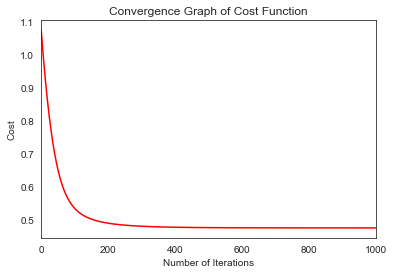

In [433]:
iterations = 1000
learning_rate = 0.08

initial_cost = cost_log(x_train_log, y_train_log, theta_log)
print("Initial Cost is: {} \n".format(initial_cost))
(cost_history, theta_optimal) = gradient_descent(x_train_log, y_train_log, theta_log, learning_rate, iterations)
print("Optimal Parameters are: \n", theta_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.xlim([0,1000])
plt.show()

In [434]:
cost_history[999]

array([0.47503852])

In [435]:
from sklearn.metrics import confusion_matrix

In [436]:
final_pred_log_test = predict(x_test_log, theta_optimal)

In [437]:
final_pred_log_train = predict(x_train_log, theta_optimal)

In [438]:
confusionmatrix_log_test = confusion_matrix(y_test_log, final_pred_log_test)
print(confusionmatrix_log_test)

[[29275  6896]
 [ 7169 29140]]


In [439]:
confusionmatrix_log_train = confusion_matrix(y_train_log, final_pred_log_train)
print(confusionmatrix_log_train)

[[69164 15464]
 [16376 68116]]


In [440]:
def accuracy(x,y):
    count=0
    for i in range(len(x)):
        if (x[i]+y[i]==2) or (x[i]+y[i]==0):
            count=count+1
    return(count/len(x))

In [441]:
accuracy(y_train_log, final_pred_log_train)

0.8117313150425733

In [442]:
accuracy(y_test_log, final_pred_log_test)

0.80594646799117

# Experiment 1

## Linear Regression

### Case 2: Changing the value of alpha and iteration to 0.05 and 2000 respectively

In [443]:
#Generating a random matrix
np.random.seed(123)
theta = np.random.rand(ind_data.shape[1],1)
theta[0:,]
theta.shape

(15, 1)

Initial cost is:  [1.93459165] 

Optimal parameters are: 
 [[ 0.38331313]
 [ 0.35476356]
 [ 0.11067004]
 [-0.35748213]
 [-0.35064644]
 [ 0.02664959]
 [ 0.02676789]
 [ 0.03307982]
 [-0.00766684]
 [-0.0183186 ]
 [-0.01262313]
 [ 0.00151355]
 [ 0.05132519]
 [ 0.06555645]
 [ 0.39804426]] 

Final cost is:  [0.20712793]


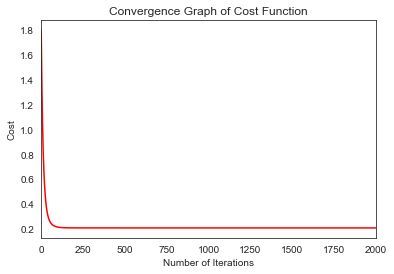

In [444]:
np.random.seed(123)
iterations = 2000
lr = 0.05

initial_cost = cost(x_train, y_train, theta)
print("Initial cost is: ", initial_cost, "\n")
(cost_hist, cost_theta) = gradient_descent_linear(x_train, y_train, theta, lr, iterations)
print("Optimal parameters are: \n", cost_theta, "\n")
print("Final cost is: ", cost_hist[-1])

plt.plot(range(len(cost_hist)), cost_hist, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.xlim([0,2000])
plt.show()

In [445]:
cost_hist[1999]

array([0.20712793])

In [446]:
final_pred_linear_test1 = pred(x_test, cost_theta)

In [447]:
result(y_test, final_pred_linear_test1)

R2 of the model:  0.4057297490863244
Mean absolute error:  0.4796264779008009
Mean squared error:  0.5942702509136756
Root mean squared error:  0.7708892598250903


In [448]:
final_pred_linear_train1 = pred(x_train, cost_theta)

In [449]:
result(y_train, final_pred_linear_train1)

R2 of the model:  0.4082059241746797
Mean absolute error:  0.4781242521606852
Mean squared error:  0.5917940758253203
Root mean squared error:  0.7692815322268697


### Case 3: Trying out multiple values of alpha i.e. 0.03, 0.07, 0.09 and iterations = 1500

In [450]:
#Generating a random matrix
np.random.seed(123)
theta = np.random.rand(ind_data.shape[1],1)
theta[0:,]
theta.shape

(15, 1)

Initial cost is:  [1.93459165] 

Optimal parameters are: 
 [[ 0.38331312]
 [ 0.3547635 ]
 [ 0.11067003]
 [-0.35748211]
 [-0.35064641]
 [ 0.02664959]
 [ 0.02676792]
 [ 0.03307982]
 [-0.00766683]
 [-0.01831854]
 [-0.01262313]
 [ 0.00151355]
 [ 0.05132519]
 [ 0.06555645]
 [ 0.39804426]] 

Final cost is:  [0.20712793]


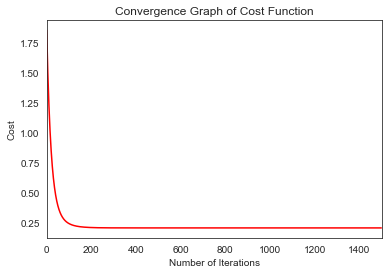

In [451]:
np.random.seed(123)
iterations = 1500
lr = 0.03

initial_cost = cost(x_train, y_train, theta)
print("Initial cost is: ", initial_cost, "\n")
(cost_hist, cost_theta) = gradient_descent_linear(x_train, y_train, theta, lr, iterations)
print("Optimal parameters are: \n", cost_theta, "\n")
print("Final cost is: ", cost_hist[-1])

plt.plot(range(len(cost_hist)), cost_hist, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.xlim([0,1500])
plt.show()

In [452]:
cost_hist[1499]

array([0.20712793])

In [453]:
final_pred_linear_test2 = pred(x_test, cost_theta)

In [454]:
result(y_test, final_pred_linear_test2)

R2 of the model:  0.4057297498045438
Mean absolute error:  0.47962646712841966
Mean squared error:  0.5942702501954562
Root mean squared error:  0.7708892593592521


In [455]:
final_pred_linear_train2 = pred(x_train, cost_theta)

In [456]:
result(y_train, final_pred_linear_train2)

R2 of the model:  0.40820592417467494
Mean absolute error:  0.4781242416845978
Mean squared error:  0.5917940758253251
Root mean squared error:  0.7692815322268728


In [457]:
#Generating a random matrix
np.random.seed(123)
theta = np.random.rand(ind_data.shape[1],1)
theta[0:,]
theta.shape

(15, 1)

Initial cost is:  [1.93459165] 

Optimal parameters are: 
 [[ 0.38331313]
 [ 0.35476356]
 [ 0.11067004]
 [-0.35748213]
 [-0.35064644]
 [ 0.02664959]
 [ 0.02676789]
 [ 0.03307982]
 [-0.00766684]
 [-0.0183186 ]
 [-0.01262313]
 [ 0.00151355]
 [ 0.05132519]
 [ 0.06555645]
 [ 0.39804426]] 

Final cost is:  [0.20712793]


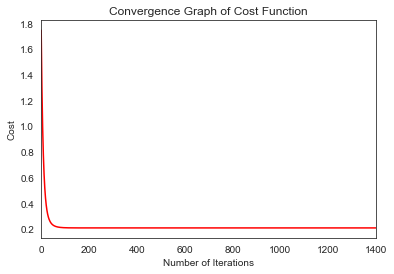

In [458]:
np.random.seed(123)
iterations = 1500
lr = 0.07

initial_cost = cost(x_train, y_train, theta)
print("Initial cost is: ", initial_cost, "\n")
(cost_hist, cost_theta) = gradient_descent_linear(x_train, y_train, theta, lr, iterations)
print("Optimal parameters are: \n", cost_theta, "\n")
print("Final cost is: ", cost_hist[-1])

plt.plot(range(len(cost_hist)), cost_hist, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.xlim([0,1400])
plt.show()

In [459]:
cost_hist[1499]

array([0.20712793])

In [460]:
final_pred_linear_test3 = pred(x_test, cost_theta)

In [461]:
result(y_test, final_pred_linear_test3)

R2 of the model:  0.4057297490863244
Mean absolute error:  0.47962647790080104
Mean squared error:  0.5942702509136756
Root mean squared error:  0.7708892598250903


In [462]:
final_pred_linear_train3 = pred(x_train, cost_theta)

In [463]:
result(y_train, final_pred_linear_train3)

R2 of the model:  0.4082059241746796
Mean absolute error:  0.4781242521606854
Mean squared error:  0.5917940758253204
Root mean squared error:  0.7692815322268697


In [464]:
#Generating a random matrix
np.random.seed(123)
theta = np.random.rand(ind_data.shape[1],1)
theta[0:,]
theta.shape

(15, 1)

Initial cost is:  [1.93459165] 

Optimal parameters are: 
 [[ 0.38331313]
 [ 0.35476356]
 [ 0.11067004]
 [-0.35748213]
 [-0.35064644]
 [ 0.02664959]
 [ 0.02676789]
 [ 0.03307982]
 [-0.00766684]
 [-0.0183186 ]
 [-0.01262313]
 [ 0.00151355]
 [ 0.05132519]
 [ 0.06555645]
 [ 0.39804426]] 

Final cost is:  [0.20712793]


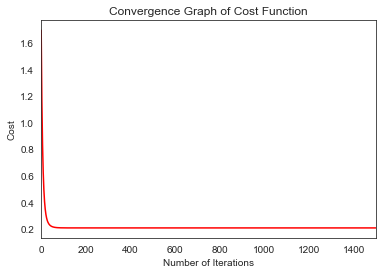

In [465]:
np.random.seed(123)
iterations = 1500
lr = 0.09

initial_cost = cost(x_train, y_train, theta)
print("Initial cost is: ", initial_cost, "\n")
(cost_hist, cost_theta) = gradient_descent_linear(x_train, y_train, theta, lr, iterations)
print("Optimal parameters are: \n", cost_theta, "\n")
print("Final cost is: ", cost_hist[-1])

plt.plot(range(len(cost_hist)), cost_hist, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.xlim([0,1500])
plt.show()

In [467]:
cost_hist[1499]

array([0.20712793])

In [468]:
final_pred_linear_test4 = pred(x_test, cost_theta)

In [469]:
result(y_test, final_pred_linear_test4)

R2 of the model:  0.4057297490863244
Mean absolute error:  0.47962647790080104
Mean squared error:  0.5942702509136756
Root mean squared error:  0.7708892598250903


In [470]:
final_pred_linear_train4 = pred(x_train, cost_theta)

In [471]:
result(y_train, final_pred_linear_train4)

R2 of the model:  0.4082059241746797
Mean absolute error:  0.4781242521606854
Mean squared error:  0.5917940758253203
Root mean squared error:  0.7692815322268697


### Case 4: Varying the alpha in the range of (0.1 to 0.3) for 1500 iterations

In [472]:
#Generating a random matrix
np.random.seed(123)
theta = np.random.rand(ind_data.shape[1],1)
theta[0:,]
theta.shape

(15, 1)

Initial cost is:  [1.93459165] 

Optimal parameters are: 
 [[ 0.38331313]
 [ 0.35476356]
 [ 0.11067004]
 [-0.35748213]
 [-0.35064644]
 [ 0.02664959]
 [ 0.02676789]
 [ 0.03307982]
 [-0.00766684]
 [-0.0183186 ]
 [-0.01262313]
 [ 0.00151355]
 [ 0.05132519]
 [ 0.06555645]
 [ 0.39804426]] 

Final cost is:  [0.20712793]


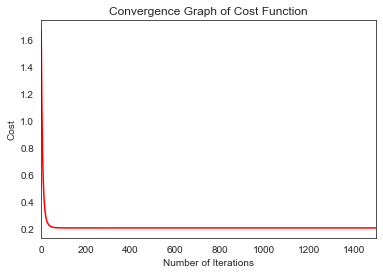

In [473]:
np.random.seed(123)
iterations = 1500
lr = 0.1

initial_cost = cost(x_train, y_train, theta)
print("Initial cost is: ", initial_cost, "\n")
(cost_hist, cost_theta) = gradient_descent_linear(x_train, y_train, theta, lr, iterations)
print("Optimal parameters are: \n", cost_theta, "\n")
print("Final cost is: ", cost_hist[-1])

plt.plot(range(len(cost_hist)), cost_hist, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.xlim([0,1500])
plt.show()

In [474]:
cost_hist[1499]

array([0.20712793])

In [475]:
final_pred_linear_test5 = pred(x_test, cost_theta)

In [476]:
result(y_test, final_pred_linear_test5)

R2 of the model:  0.4057297490863244
Mean absolute error:  0.47962647790080104
Mean squared error:  0.5942702509136756
Root mean squared error:  0.7708892598250903


In [477]:
final_pred_linear_train5 = pred(x_train, cost_theta)

In [478]:
result(y_train, final_pred_linear_train5)

R2 of the model:  0.4082059241746796
Mean absolute error:  0.47812425216068544
Mean squared error:  0.5917940758253204
Root mean squared error:  0.7692815322268697


In [464]:
#Generating a random matrix
np.random.seed(123)
theta = np.random.rand(ind_data.shape[1],1)
theta[0:,]
theta.shape

(15, 1)

Initial cost is:  [1.93459165] 

Optimal parameters are: 
 [[ 0.38331313]
 [ 0.35476356]
 [ 0.11067004]
 [-0.35748213]
 [-0.35064644]
 [ 0.02664959]
 [ 0.02676789]
 [ 0.03307982]
 [-0.00766684]
 [-0.0183186 ]
 [-0.01262313]
 [ 0.00151355]
 [ 0.05132519]
 [ 0.06555645]
 [ 0.39804426]] 

Final cost is:  [0.20712793]


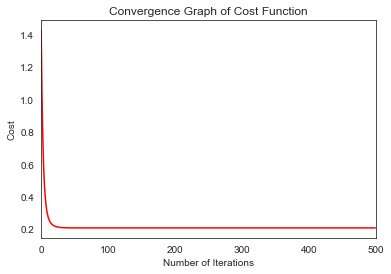

In [479]:
np.random.seed(123)
iterations = 500
lr = 0.2

initial_cost = cost(x_train, y_train, theta)
print("Initial cost is: ", initial_cost, "\n")
(cost_hist, cost_theta) = gradient_descent_linear(x_train, y_train, theta, lr, iterations)
print("Optimal parameters are: \n", cost_theta, "\n")
print("Final cost is: ", cost_hist[-1])

plt.plot(range(len(cost_hist)), cost_hist, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.xlim([0,500])
plt.show()

In [481]:
cost_hist[499]

array([0.20712793])

In [480]:
final_pred_linear_test6 = pred(x_test, cost_theta)

In [482]:
result(y_test, final_pred_linear_test6)

R2 of the model:  0.4057297490863244
Mean absolute error:  0.47962647790080126
Mean squared error:  0.5942702509136756
Root mean squared error:  0.7708892598250903


In [483]:
final_pred_linear_train6 = pred(x_train, cost_theta)

In [484]:
result(y_train, final_pred_linear_train6)

R2 of the model:  0.4082059241746796
Mean absolute error:  0.4781242521606857
Mean squared error:  0.5917940758253204
Root mean squared error:  0.7692815322268697


In [485]:
#Generating a random matrix
np.random.seed(123)
theta = np.random.rand(ind_data.shape[1],1)
theta[0:,]
theta.shape

(15, 1)

Initial cost is:  [1.93459165] 

Optimal parameters are: 
 [[ 0.38331313]
 [ 0.35476356]
 [ 0.11067004]
 [-0.35748213]
 [-0.35064644]
 [ 0.02664959]
 [ 0.02676789]
 [ 0.03307982]
 [-0.00766684]
 [-0.0183186 ]
 [-0.01262313]
 [ 0.00151355]
 [ 0.05132519]
 [ 0.06555645]
 [ 0.39804426]] 

Final cost is:  [0.20712793]


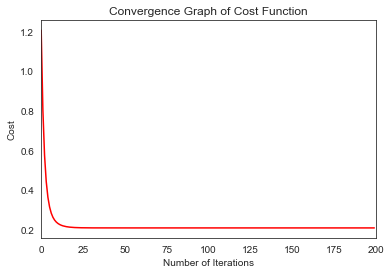

In [486]:
np.random.seed(123)
iterations = 200
lr = 0.3

initial_cost = cost(x_train, y_train, theta)
print("Initial cost is: ", initial_cost, "\n")
(cost_hist, cost_theta) = gradient_descent_linear(x_train, y_train, theta, lr, iterations)
print("Optimal parameters are: \n", cost_theta, "\n")
print("Final cost is: ", cost_hist[-1])

plt.plot(range(len(cost_hist)), cost_hist, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.xlim([0,200])
plt.show()

In [487]:
cost_hist[199]

array([0.20712793])

In [488]:
final_pred_linear_test7 = pred(x_test, cost_theta)

In [489]:
result(y_test, final_pred_linear_test7)

R2 of the model:  0.4057297490874098
Mean absolute error:  0.4796264778873493
Mean squared error:  0.5942702509125902
Root mean squared error:  0.7708892598243864


In [490]:
final_pred_linear_train7 = pred(x_train, cost_theta)

In [491]:
result(y_train, final_pred_linear_train7)

R2 of the model:  0.40820592417467993
Mean absolute error:  0.4781242521477005
Mean squared error:  0.5917940758253201
Root mean squared error:  0.7692815322268695


# Logistic Regression

### Case 2: Changing the values of alpha and iteration to 0.2 and 300 respectively

In [492]:
np.random.seed(123)
n = np.size(x_train_log,1)
theta_log = np.random.rand(n,1)

Initial Cost is: [[1.08857872]] 

Optimal Parameters are: 
 [[ 1.2993171 ]
 [ 0.83110043]
 [ 0.14473601]
 [-0.88021036]
 [-0.74389502]
 [-0.04456497]
 [-0.07518351]
 [-0.01823618]
 [-0.06380521]
 [-0.13331168]
 [-0.32165159]
 [-0.02865806]
 [-0.3965314 ]
 [-0.0815301 ]
 [ 0.39804426]] 



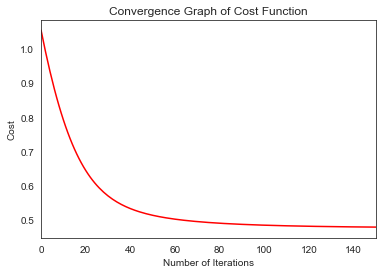

In [493]:
np.random.seed(123)
iterations = 300
learning_rate = 0.2

initial_cost = cost_log(x_train_log, y_train_log, theta_log)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, theta_optimal) = gradient_descent(x_train_log, y_train_log, theta_log, learning_rate, iterations)

print("Optimal Parameters are: \n", theta_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.xlim([0,150])
plt.show()

In [305]:
cost_history[299]

array([0.47513171])

In [494]:
final_pred_log_test1 = predict(x_test_log, theta_optimal)

In [495]:
final_pred_log_train1 = predict(x_train_log, theta_optimal)

In [496]:
confusionmatrix_log_test1 = confusion_matrix(y_test_log, final_pred_log_test1)
print(confusionmatrix_log_test1)

[[29280  6891]
 [ 7165 29144]]


In [497]:
confusionmatrix_log_train1 = confusion_matrix(y_train_log, final_pred_log_train1)
print(confusionmatrix_log_train1)

[[69160 15468]
 [16392 68100]]


In [498]:
accuracy(y_train_log, final_pred_log_train1)

0.8116130558183539

In [499]:
accuracy(y_test_log, final_pred_log_test1)

0.8060706401766005

### Case 3: Trying out model at alpha equal to 0.3 and iteration equal to 250

In [500]:
np.random.seed(123)
n = np.size(x_train_log,1)
theta_log = np.random.rand(n,1)

Initial Cost is: [[1.08857872]] 

Optimal Parameters are: 
 [[ 1.31823235]
 [ 0.84571974]
 [ 0.1495761 ]
 [-0.89628953]
 [-0.75823598]
 [-0.04630592]
 [-0.07701656]
 [-0.0184259 ]
 [-0.07174598]
 [-0.14114018]
 [-0.32554329]
 [-0.02904031]
 [-0.40122996]
 [-0.08246381]
 [ 0.39804426]] 



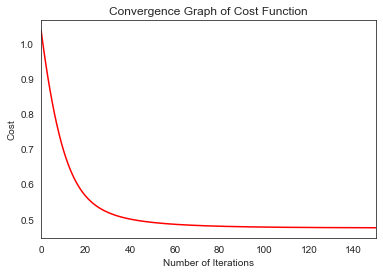

In [501]:
np.random.seed(123)
iterations = 250
learning_rate = 0.3

initial_cost = cost_log(x_train_log, y_train_log, theta_log)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, theta_optimal) = gradient_descent(x_train_log, y_train_log, theta_log, learning_rate, iterations)

print("Optimal Parameters are: \n", theta_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.xlim([0,150])
plt.show()

In [502]:
cost_history[249]

array([0.475047])

In [503]:
final_pred_log_test2 = predict(x_test_log, theta_optimal)

In [504]:
final_pred_log_train2 = predict(x_train_log, theta_optimal)

In [505]:
confusionmatrix_log_test2 = confusion_matrix(y_test_log, final_pred_log_test2)
print(confusionmatrix_log_test2)

[[29275  6896]
 [ 7167 29142]]


In [506]:
confusionmatrix_log_train2 = confusion_matrix(y_train_log, final_pred_log_train2)
print(confusionmatrix_log_train2)

[[69170 15458]
 [16376 68116]]


In [507]:
accuracy(y_train_log, final_pred_log_train2)

0.8117667928098392

In [508]:
accuracy(y_test_log, final_pred_log_test2)

0.8059740618101545

### Case 4:  When alpha = 0.05, 0.7, 0.06 and iterations = 1200, 2000, 2000

In [509]:
np.random.seed(123)
n = np.size(x_train_log,1)
theta_log = np.random.rand(n,1)

Initial Cost is: [[1.08857872]] 

Optimal Parameters are: 
 [[ 1.2987724 ]
 [ 0.83066421]
 [ 0.14459449]
 [-0.87974439]
 [-0.74347514]
 [-0.04451955]
 [-0.07512087]
 [-0.01822833]
 [-0.0635781 ]
 [-0.13306985]
 [-0.32153866]
 [-0.02864449]
 [-0.39639505]
 [-0.08150307]
 [ 0.39804426]] 



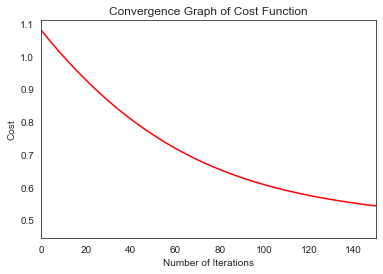

In [510]:
np.random.seed(123)
iterations = 1200
learning_rate = 0.05

initial_cost = cost_log(x_train_log, y_train_log, theta_log)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, theta_optimal) = gradient_descent(x_train_log, y_train_log, theta_log, learning_rate, iterations)

print("Optimal Parameters are: \n", theta_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.xlim([0,150])
plt.show()

In [511]:
cost_history[1199]

array([0.47513511])

In [512]:
final_pred_log_test3 = predict(x_test_log, theta_optimal)

In [513]:
final_pred_log_train3 = predict(x_train_log, theta_optimal)

In [514]:
confusionmatrix_log_test3 = confusion_matrix(y_test_log, final_pred_log_test3)
print(confusionmatrix_log_test3)

[[29280  6891]
 [ 7166 29143]]


In [515]:
confusionmatrix_log_train3 = confusion_matrix(y_train_log, final_pred_log_train3)
print(confusionmatrix_log_train3)

[[69157 15471]
 [16391 68101]]


In [516]:
accuracy(y_train_log, final_pred_log_train3)

0.8116012298959319

In [517]:
accuracy(y_test_log, final_pred_log_test3)

0.8060568432671081

In [518]:
np.random.seed(123)
n = np.size(x_train_log,1)
theta_log = np.random.rand(n,1)

Initial Cost is: [[1.08857872]] 

Optimal Parameters are: 
 [[ 1.33519302]
 [ 0.85830114]
 [ 0.15386926]
 [-0.91065927]
 [-0.77089332]
 [-0.04797434]
 [-0.0783236 ]
 [-0.01858096]
 [-0.0788946 ]
 [-0.14758884]
 [-0.329033  ]
 [-0.02936715]
 [-0.40544314]
 [-0.08330316]
 [ 0.39804426]] 



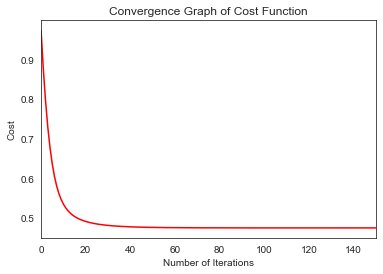

In [519]:
np.random.seed(123)
iterations = 2000
learning_rate = 0.7

initial_cost = cost_log(x_train_log, y_train_log, theta_log)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, theta_optimal) = gradient_descent(x_train_log, y_train_log, theta_log, learning_rate, iterations)

print("Optimal Parameters are: \n", theta_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.xlim([0,150])
plt.show()

In [520]:
cost_history[1999]

array([0.47502291])

In [521]:
final_pred_log_test4 = predict(x_test_log, theta_optimal)

In [522]:
final_pred_log_train4 = predict(x_train_log, theta_optimal)

In [523]:
confusionmatrix_log_test4 = confusion_matrix(y_test_log, final_pred_log_test4)
print(confusionmatrix_log_test4)

[[29289  6882]
 [ 7170 29139]]


In [524]:
confusionmatrix_log_train4 = confusion_matrix(y_train_log, final_pred_log_train4)
print(confusionmatrix_log_train4)

[[69183 15445]
 [16380 68112]]


In [526]:
accuracy(y_train_log, final_pred_log_train4)

0.811820009460738

In [527]:
accuracy(y_test_log, final_pred_log_test4)

0.8061258278145695

In [528]:
np.random.seed(123)
n = np.size(x_train_log,1)
theta_log = np.random.rand(n,1)

Initial Cost is: [[1.08857872]] 

Optimal Parameters are: 
 [[ 1.33324442]
 [ 0.85689426]
 [ 0.1533775 ]
 [-0.90901029]
 [-0.76945257]
 [-0.0477747 ]
 [-0.07819856]
 [-0.01856329]
 [-0.07806738]
 [-0.14688752]
 [-0.32863303]
 [-0.02932978]
 [-0.40496032]
 [-0.08320686]
 [ 0.39804426]] 



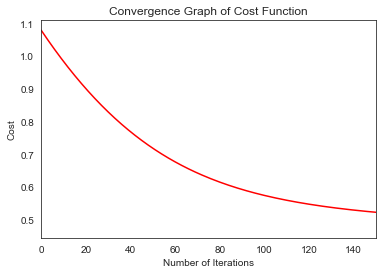

In [529]:
np.random.seed(123)
iterations = 2000
learning_rate = 0.06

initial_cost = cost_log(x_train_log, y_train_log, theta_log)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, theta_optimal) = gradient_descent(x_train_log, y_train_log, theta_log, learning_rate, iterations)

print("Optimal Parameters are: \n", theta_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.xlim([0,150])
plt.show()

In [530]:
cost_history[1999]

array([0.47502328])

In [531]:
final_pred_log_test5 = predict(x_test_log, theta_optimal)

In [532]:
final_pred_log_train5 = predict(x_train_log, theta_optimal)

In [533]:
confusionmatrix_log_test5 = confusion_matrix(y_test_log, final_pred_log_test5)
print(confusionmatrix_log_test5)

[[29282  6889]
 [ 7172 29137]]


In [534]:
confusionmatrix_log_train5 = confusion_matrix(y_train_log, final_pred_log_train5)
print(confusionmatrix_log_train5)

[[69184 15444]
 [16382 68110]]


In [535]:
accuracy(y_train_log, final_pred_log_train5)

0.811814096499527

In [536]:
accuracy(y_test_log, final_pred_log_test5)

0.8060016556291391

In [566]:
np.random.seed(123)
n = np.size(x_train_log,1)
theta_log = np.random.rand(n,1)

Initial Cost is: [[1.08857872]] 

Optimal Parameters are: 
 [[ 1.33454535]
 [ 0.857836  ]
 [ 0.15370583]
 [-0.91011128]
 [-0.77041528]
 [-0.04790742]
 [-0.07828367]
 [-0.01857509]
 [-0.07861903]
 [-0.14735815]
 [-0.32890019]
 [-0.02935473]
 [-0.40528284]
 [-0.08327118]
 [ 0.39804426]] 



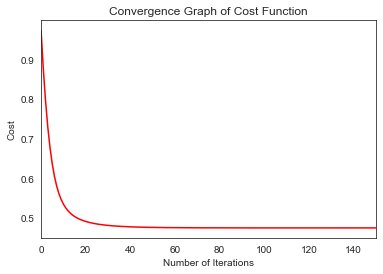

In [567]:
np.random.seed(123)
iterations = 200
learning_rate = 0.7

initial_cost = cost_log(x_train_log, y_train_log, theta_log)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, theta_optimal) = gradient_descent(x_train_log, y_train_log, theta_log, learning_rate, iterations)

print("Optimal Parameters are: \n", theta_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.xlim([0,150])
plt.show()

In [568]:
cost_history[199]

array([0.47502297])

In [569]:
final_pred_log_test5 = predict(x_test_log, theta_optimal)

In [570]:
final_pred_log_train5 = predict(x_train_log, theta_optimal)

In [571]:
confusionmatrix_log_test5 = confusion_matrix(y_test_log, final_pred_log_test5)
print(confusionmatrix_log_test5)

[[29287  6884]
 [ 7171 29138]]


In [572]:
confusionmatrix_log_train5 = confusion_matrix(y_train_log, final_pred_log_train5)
print(confusionmatrix_log_train5)

[[69184 15444]
 [16380 68112]]


In [573]:
accuracy(y_train_log, final_pred_log_train5)

0.811825922421949

In [574]:
accuracy(y_test_log, final_pred_log_test5)

0.8060844370860927

# Experiment 2

## Linear Regression

In [641]:
def gradient_descent_linear_exp2(x, y, theta, lr, iterations, threshold):
    m = len(data.axes[0])
    cost_hist = []
    for i in range(iterations):
        theta = theta - (lr/m)*np.matmul(x.T, ((np.matmul(x,theta))-y))
        cost_hist.append(cost(x, y, theta))
#         print(cost_hist[i][0])
        if i > 1 and (cost_hist[i-1][0] - cost_hist[i][0]) < threshold:
            break
    return [cost_hist, theta, lr, threshold, i]

In [642]:
thresh = [10**-i for i in range(3,8)]
alphas = [0.03, 0.04, 0.05 ]
results_lin = []
thetas_lin = []


x = np.array(x_train)
y = np.array(y_train)
iters = 10000
i = 123

for threshold in thresh:
    for alpha in alphas:
        np.random.seed(i)
        theta_expt2_lin = np.random.rand(x.shape[1],1)

        results_lin.append(gradient_descent_linear_exp2(x_train,y_train,theta_expt2_lin,alpha, iters, threshold))
        i = i + 1
        print("threshold = {} , alpha = {}  and iterations = {}".format(threshold, alpha, results_lin[len(results_lin) - 1][4]))
        
        
#theta_expt2_lin = np.random.rand(x_train.shape[1],1)

threshold = 0.001 , alpha = 0.03  and iterations = 102
threshold = 0.001 , alpha = 0.04  and iterations = 79
threshold = 0.001 , alpha = 0.05  and iterations = 65
threshold = 0.0001 , alpha = 0.03  and iterations = 195
threshold = 0.0001 , alpha = 0.04  and iterations = 160
threshold = 0.0001 , alpha = 0.05  and iterations = 95
threshold = 1e-05 , alpha = 0.03  and iterations = 250
threshold = 1e-05 , alpha = 0.04  and iterations = 245
threshold = 1e-05 , alpha = 0.05  and iterations = 180
threshold = 1e-06 , alpha = 0.03  and iterations = 413
threshold = 1e-06 , alpha = 0.04  and iterations = 311
threshold = 1e-06 , alpha = 0.05  and iterations = 225
threshold = 1e-07 , alpha = 0.03  and iterations = 520
threshold = 1e-07 , alpha = 0.04  and iterations = 377
threshold = 1e-07 , alpha = 0.05  and iterations = 312


In [643]:
results_lin_backup = results_lin

In [651]:
# results_lin[0]
## cost beta alpha,threshold,iter

[[array([1.85198777]),
  array([1.77360835]),
  array([1.69922878]),
  array([1.62863668]),
  array([1.5616312]),
  array([1.49802242]),
  array([1.43763071]),
  array([1.3802862]),
  array([1.32582822]),
  array([1.27410479]),
  array([1.22497216]),
  array([1.17829432]),
  array([1.13394263]),
  array([1.09179537]),
  array([1.05173738]),
  array([1.01365969]),
  array([0.97745921]),
  array([0.94303835]),
  array([0.91030477]),
  array([0.87917109]),
  array([0.84955459]),
  array([0.82137696]),
  array([0.7945641]),
  array([0.76904584]),
  array([0.74475575]),
  array([0.72163094]),
  array([0.69961185]),
  array([0.67864209]),
  array([0.65866826]),
  array([0.63963976]),
  array([0.6215087]),
  array([0.6042297]),
  array([0.58775976]),
  array([0.57205816]),
  array([0.55708632]),
  array([0.54280767]),
  array([0.52918757]),
  array([0.51619318]),
  array([0.50379338]),
  array([0.49195868]),
  array([0.48066112]),
  array([0.46987418]),
  array([0.45957275]),
  array([0.44973

In [652]:
result_df = pd.DataFrame(columns = (["threshold", "alpha", "final cost", "iterations",'const', 'MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI',
       'VWM', 'VWN', 'STRM', 'STRN', 'SA', 'SB']))
print(result_df)
for i in range(0,len(results_lin)):
    result_df.loc[i] = [results_lin[i][3], results_lin[i][2], results_lin[i][0][-1], results_lin[i][4]] + [results_lin[i][1][j][0] for j in range(0,15)] #2nd last
result_df.head()

Empty DataFrame
Columns: [threshold, alpha, final cost, iterations, const, MWG, NWG, KWG, MDIMC, NDIMC, MDIMA, NDIMB, KWI, VWM, VWN, STRM, STRN, SA, SB]
Index: []


,threshold,alpha,final cost,iterations,const,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB
0,0.0010,0.03,[0.24113827481162065],102,0.326089,0.202614,0.051277,-0.186090,-0.162408,0.013645,0.117832,0.106119,0.097565,0.163592,0.027501,0.084801,0.095029,0.064375,0.398044
1,0.0010,0.04,[0.23183104609078398],79,0.266934,0.263765,0.106236,-0.222269,-0.229932,0.039591,0.092997,0.070123,0.115775,0.135525,0.050373,0.015469,0.086019,0.159240,0.467599
2,0.0010,0.05,[0.22895397788086957],65,0.277435,0.211679,0.147731,-0.314845,-0.294987,0.127495,0.107154,0.068921,0.136046,0.140479,0.020969,0.015988,0.131422,0.067175,0.847512
3,0.0001,0.03,[0.21138024286509235],195,0.332360,0.287980,0.084689,-0.305397,-0.290811,0.035208,0.044705,0.033174,0.046116,0.052793,0.000189,0.014706,0.055920,0.079354,0.055832
4,0.0001,0.04,[0.21033124159131072],160,0.348899,0.302668,0.078454,-0.296351,-0.287634,0.016277,0.032644,0.040014,0.029726,0.036300,-0.003074,0.003041,0.052877,0.065612,0.649656


In [653]:
def possibilities(x, y, results_df):
    x = np.asarray(x)
    y = np.asarray(y).T
    m_matrix = np.asarray(results_df.iloc[:,4:])
    prop = result_df.iloc[:,0:4]
    y_hat_all = m_matrix@x.T
    err = y-y_hat_all
    err_all = (np.sum(err**2, axis = 1)/len(x)).reshape([-1,1])
    print(err_all.shape)
    final_err_prop = pd.concat([prop, pd.DataFrame(err_all)], axis = 1, ignore_index=True)
    final_err_prop.columns = ["threshold", "alpha", "final cost", "iterations","RMSE"]
    return final_err_prop

In [654]:
final_errors_properties = possibilities(x_train, y_train, result_df)
final_errors_properties_test = possibilities(x_test, y_test, result_df)

(15, 1)
(15, 1)


In [655]:
final_errors_properties_filtered = final_errors_properties[final_errors_properties["threshold"] < 0.1]
final_errors_properties_filtered_test = final_errors_properties_test[final_errors_properties_test["threshold"] < 0.1]

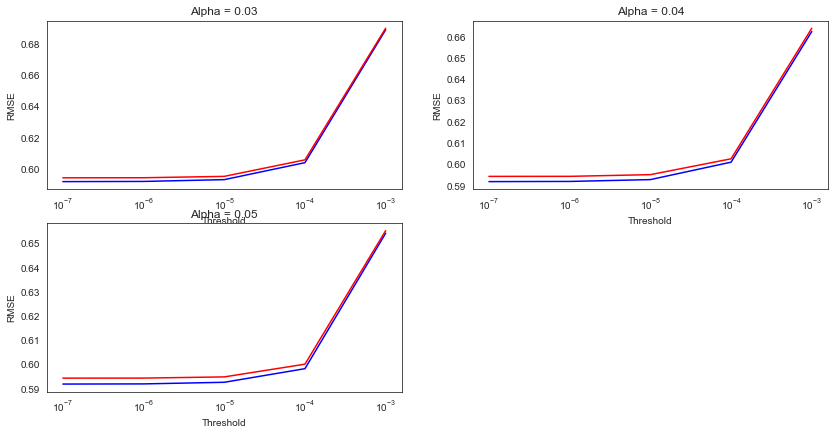

In [669]:
fig = plt.figure(figsize = [14,18])
j = 1
for alpha in alphas:
    final_errors_properties_curr = final_errors_properties_filtered[final_errors_properties_filtered["alpha"] == alpha]
    final_errors_properties_curr_test = final_errors_properties_filtered_test[final_errors_properties_filtered_test["alpha"] == alpha]
    ax = fig.add_subplot(5,2, j)
    line, = ax.plot(final_errors_properties_curr['threshold'], final_errors_properties_curr['RMSE'], color='blue')
    line2, = ax.plot(final_errors_properties_curr_test['threshold'], final_errors_properties_curr_test['RMSE'], color='red')
    j = j + 1
    ax.set_xscale('log')
    ax.set_xlabel('Threshold')
    ax.set_ylabel('RMSE')
    ax.set_title('Alpha = {}'.format(alpha))

In [660]:
def gradient_descent_linear_exp2_v2(x, y, theta, lr, iterations, threshold):
    m = len(data.axes[0])
    cost_hist = []
    thetas = []
    thetas.append(theta)
    for i in range(iterations):
        theta = theta - (lr/m)*np.matmul(x.T, ((np.matmul(x,theta))-y))
        thetas.append(theta)
        cost_hist.append(cost(x, y, theta))
#         print(cost_hist[i][0])
        if i > 1 and (cost_hist[i-1][0] - cost_hist[i][0]) < threshold:
            break
    return [cost_hist, thetas, lr, threshold, i]

In [661]:
np.random.seed(420)
x = np.array(x_train)
y = np.array(y_train)
theta = np.random.rand(x.shape[1],1)
lr = 0.05
iterations = 5000

In [662]:
all_info = gradient_descent_linear_exp2_v2(x, y, theta, lr, iterations, 10**-6)

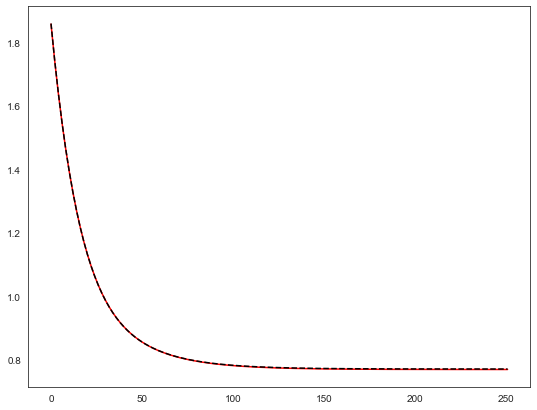

In [667]:
plt.figure(figsize=(9, 7))#, facecolor = "#e8f4f8")

all_coefficients = [row.ravel() for row in all_info[1]]
all_coefficients = np.asarray(all_coefficients).T
y_all_possibles = x_train@all_coefficients
err = y_all_possibles - np.asarray(y_train)
train_rmse = np.sqrt(np.sum(err**2, axis = 0)/len(x_train))
plt.plot(train_rmse, color = 'red', linestyle='solid')

y_all_possibles_test = x_test@all_coefficients
err = y_all_possibles_test - np.asarray(y_test)
test_rmse = np.sqrt(np.sum(err**2, axis = 0)/len(x_test))
plt.plot(test_rmse, color = 'black', linestyle='dashed')

Text(0.5, 1.0, 'No of iterations vs threshold\nAlpha = 0.05')

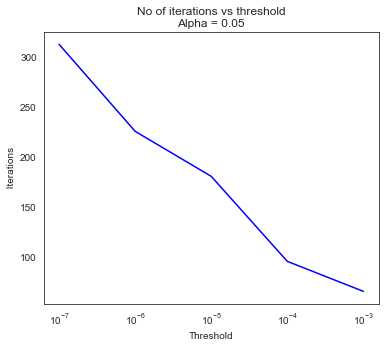

In [668]:
final_errors_properties_filtered_2 = final_errors_properties[final_errors_properties['alpha']==0.05]
final_errors_properties_filtered_2.shape
fig = plt.figure(figsize = [6,5])
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(final_errors_properties_filtered_2['threshold'], final_errors_properties_filtered_2['iterations'], color='blue')
ax.set_xscale('log')
ax.set_xlabel('Threshold')
ax.set_ylabel(' Iterations')
ax.set_title('No of iterations vs threshold\nAlpha = 0.05')

## Logistic Regression

In [649]:
def gradient_descent_log_exp2(x, y, theta, learning_rate, iterations, threshold):
    m = len(y)
    cost_history = []#np.zeros((iterations,1))

    for i in range(iterations):
        theta = theta - (learning_rate/m) * (x.T @ (sigmoid(x @ theta) - y)) 
        cost_history.append(cost_log(x, y, theta)[0])
        print(cost_log(x, y, theta)[0][0])
        if i > 1 and (cost_history[i-1][0] - cost_history[i][0]) < threshold:
            break

    return [cost_history, theta, lr, threshold, i]

In [640]:
thresh = [10**-i for i in range(3,8)]
alphas = [0.03, 0.04, 0.05 ]
results_log = []
thetas_log = []


x = np.array(x_train_log)
y = np.array(y_train_log)
iters = 10000
i = 123

for threshold in thresh:
    for alpha in alphas:
        np.random.seed(i)
        theta_expt2_log = np.random.rand(x.shape[1],1)

        results_log.append(gradient_descent_log_exp2(x_train,y_train,theta_expt2_log,alpha, iters, threshold))
        i = i + 1
        print("threshold = {} , alpha = {}  and iterations = {}".format(threshold, alpha, results_log[len(results_log) - 1][4]))
        
        
#theta_expt2_lin = np.random.rand(x_train.shape[1],1)

threshold = 0.001 , alpha = 0.03  and iterations = 594
threshold = 0.001 , alpha = 0.04  and iterations = 479
threshold = 0.001 , alpha = 0.05  and iterations = 403
threshold = 0.0001 , alpha = 0.03  and iterations = 880


KeyboardInterrupt: 

In [650]:
#Test case
#gradient_descent_log_exp2(x_train, y_train, np.random.rand(x.shape[1],1), 0.2, 100, .01)

0.7231895941093216
0.6579911274081669
0.5967324350739948
0.539198881760538
0.48516997781597043
0.43442245776096755
0.38673323238267243
0.34188220171310973
0.2996548646791022
0.2598446321332826
0.22225474944444729
0.1866997587070169
0.15300647102815398
0.121014464631796
0.09057616266761001
0.06155656846989554
0.033832744560218266
0.00729311800271251
-0.018163316587911274
-0.042627839678542966
-0.06618285308940867
-0.08890270089363513
-0.11085444645052156
-0.13209859505674768
-0.15268975742492166
-0.17267725309473397
-0.1921056553867233
-0.2110152810108457
-0.2294426282538991
-0.2474207680241648
-0.26497969209302197
-0.2821466227536701
-0.2989462878911298
-0.3154011651744742
-0.331531698773769
-0.34735649169121446
-0.36289247649145645
-0.3781550669278977
-0.3931582926945418
-0.40791491928842083
-0.42243655474653174
-0.436733744822746
-0.450816057993125
-0.46469216152069576
-0.47836988967125643
-0.49185630504832234
-0.5051577539061753
-0.5182799162036252
-0.5312278510760114
-0.54400603832

[[array([0.72318959]),
  array([0.65799113]),
  array([0.59673244]),
  array([0.53919888]),
  array([0.48516998]),
  array([0.43442246]),
  array([0.38673323]),
  array([0.3418822]),
  array([0.29965486]),
  array([0.25984463]),
  array([0.22225475]),
  array([0.18669976]),
  array([0.15300647]),
  array([0.12101446]),
  array([0.09057616]),
  array([0.06155657]),
  array([0.03383274]),
  array([0.00729312]),
  array([-0.01816332]),
  array([-0.04262784]),
  array([-0.06618285]),
  array([-0.0889027]),
  array([-0.11085445]),
  array([-0.1320986]),
  array([-0.15268976]),
  array([-0.17267725]),
  array([-0.19210566]),
  array([-0.21101528]),
  array([-0.22944263]),
  array([-0.24742077]),
  array([-0.26497969]),
  array([-0.28214662]),
  array([-0.29894629]),
  array([-0.31540117]),
  array([-0.3315317]),
  array([-0.34735649]),
  array([-0.36289248]),
  array([-0.37815507]),
  array([-0.39315829]),
  array([-0.40791492]),
  array([-0.42243655]),
  array([-0.43673374]),
  array([-0.45

# Experiment 3

## Linear Regression

In [537]:
data_exp3 = data.drop(columns = ['MWG', 'KWG', 'NDIMC', 'NDIMB', 'VWM', 'STRM'])
#data_exp3 = np.array(data_exp3)
data_exp3.shape

(241600, 10)

In [538]:
data_exp3 = data_exp3.iloc[:, 0:9]
data_exp3.shape

(241600, 9)

In [539]:
x_train_exp3, x_test_exp3, y_train_exp3, y_test_exp3 = train_test_split(data_exp3, data['Avg_run'], test_size = 0.3)
x_train_exp3.shape, x_test_exp3.shape, y_train_exp3.shape, y_test_exp3.shape

((169120, 9), (72480, 9), (169120,), (72480,))

In [540]:
y_train_exp3 = np.array(y_train_exp3).reshape(-1,1)
y_test_exp3 = np.array(y_test_exp3).reshape(-1,1)
y_train_exp3.shape, y_test_exp3.shape

((169120, 1), (72480, 1))

In [541]:
x_train_exp3 = standardization(x_train_exp3)
x_test_exp3 = standardization(x_test_exp3)
y_train_exp3 = standardization(y_train_exp3)
y_test_exp3 = standardization(y_test_exp3)

In [542]:
#Generating a random matrix
np.random.seed(123)
theta = np.random.rand(data_exp3.shape[1],1)
theta[0:,]
theta.shape

(9, 1)

Initial cost is:  [1.2881842] 

Optimal parameters are: 
 [[ 0.30321824]
 [-0.22531222]
 [ 0.03284038]
 [ 0.03336728]
 [ 0.04084867]
 [ 0.00107604]
 [ 0.05026061]
 [ 0.06320153]
 [ 0.4809319 ]] 

Final cost is:  [0.29390667]


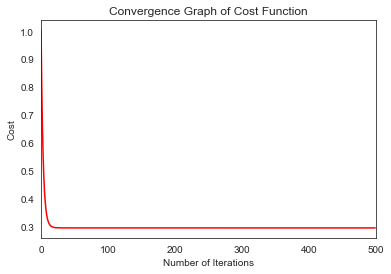

In [544]:
np.random.seed(123)
iterations = 500
lr = 0.2

initial_cost = cost(x_train_exp3, y_train_exp3, theta)
print("Initial cost is: ", initial_cost, "\n")
(cost_hist, cost_theta) = gradient_descent_linear(x_train_exp3, y_train_exp3, theta, lr, iterations)
print("Optimal parameters are: \n", cost_theta, "\n")
print("Final cost is: ", cost_hist[-1])

plt.plot(range(len(cost_hist)), cost_hist, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.xlim([0,500])
plt.show()

In [545]:
cost_hist[499]

array([0.29390667])

In [547]:
final_pred_linear_test1 = pred(x_test_exp3, cost_theta)

In [548]:
result(y_test_exp3, final_pred_linear_test1)

R2 of the model:  0.16157820960517433
Mean absolute error:  0.5479735951273799
Mean squared error:  0.8384217903948257
Root mean squared error:  0.915653750276176


In [549]:
final_pred_linear_train1 = pred(x_train_exp3, cost_theta)

In [550]:
result(y_train_exp3, final_pred_linear_train1)

R2 of the model:  0.1602666687584654
Mean absolute error:  0.5490952697263158
Mean squared error:  0.8397333312415347
Root mean squared error:  0.9163696477085733


## Logistic Regression

In [551]:
df_exp3 = df.drop(columns = ['MWG', 'KWG', 'NDIMC', 'NDIMB', 'VWM', 'STRM']) 
df_exp3.shape

(241600, 10)

In [552]:
df_exp3 = df_exp3.iloc[:,0:9]
df_exp3.shape

(241600, 9)

In [553]:
x_train_log_exp3, x_test_log_exp3, y_train_log_exp3, y_test_log_exp3 = train_test_split(df_exp3, df['Avg_run'], test_size = 0.3)
x_train_log_exp3.shape, x_test_log_exp3.shape, y_train_log_exp3.shape, y_test_log_exp3.shape

((169120, 9), (72480, 9), (169120,), (72480,))

In [554]:
y_train_log_exp3 = np.array(y_train_log_exp3).reshape(-1,1)
y_test_log_exp3 = np.array(y_test_log_exp3).reshape(-1,1)
y_train_log_exp3.shape, y_test_log_exp3.shape

((169120, 1), (72480, 1))

In [555]:
x_train_log_exp3 = standardization(x_train_log_exp3)
x_test_log_exp3 = standardization(x_test_log_exp3)

In [582]:
np.random.seed(123)
n = np.size(x_train_log_exp3,1)
theta_log = np.random.rand(n,1)

Initial Cost is: [[1.0192187]] 

Optimal Parameters are: 
 [[ 0.49121294]
 [-0.42287975]
 [ 0.04955329]
 [-0.01478695]
 [ 0.01726704]
 [-0.01911846]
 [-0.28362216]
 [-0.05987294]
 [ 0.4809319 ]] 



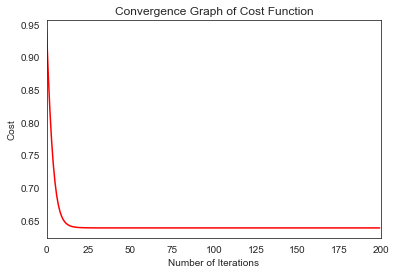

In [583]:
np.random.seed(123)
iterations = 200
learning_rate = 0.7

initial_cost = cost_log(x_train_log_exp3, y_train_log_exp3, theta_log)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, theta_optimal) = gradient_descent(x_train_log_exp3, y_train_log_exp3, theta_log, learning_rate, iterations)

print("Optimal Parameters are: \n", theta_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.xlim([0,200])
plt.show()

In [564]:
cost_history[199]

array([0.63817702])

In [584]:
final_pred_log_test_exp3 = predict(x_test_log_exp3, theta_optimal)

In [586]:
final_pred_log_train_exp3 = predict(x_train_log_exp3, theta_optimal)

In [587]:
confusionmatrix_log_test_exp3 = confusion_matrix(y_test_log_exp3, final_pred_log_test5)
print(confusionmatrix_log_test_exp3)

[[29287  6884]
 [ 7171 29138]]


In [588]:
confusionmatrix_log_train_exp3 = confusion_matrix(y_train_log_exp3, final_pred_log_train5)
print(confusionmatrix_log_train_exp3)

[[69184 15444]
 [16380 68112]]


In [591]:
accuracy(y_train_log_exp3, final_pred_log_train_exp3)

0.6420529801324504

In [592]:
accuracy(y_test_log_exp3, final_pred_log_test_exp3)

0.6419012141280354

# Experiment 4

## Linear Regression

In [593]:
corr = data.corr()
corr.style.background_gradient(cmap = 'coolwarm').set_precision(4)

C:\Users\ikapo\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,intercept,Avg_run
MWG,1,0.0005999,0.009296,0.1058,-0.00859,0.1588,0.0149,1.477e-19,0.3538,-0.000841,6.925e-21,1.385e-21,0,0,nan,0.3518
NWG,0.0005999,1,0.009296,-0.00859,0.1058,0.0149,0.1588,8.569e-19,-0.000841,0.3538,6.925e-21,1.385e-21,0,0,nan,0.3205
KWG,0.009296,0.009296,1,0.1483,0.1483,-0.03456,-0.03456,-1.81e-19,-0.01199,-0.01199,1.872e-21,0,0,0,nan,0.01123
MDIMC,0.1058,-0.00859,0.1483,1,-0.2096,0.1974,0.08461,-3.18e-18,-0.1339,0.01053,-1.121e-20,-3.735e-21,0,0,nan,-0.2211
NDIMC,-0.00859,0.1058,0.1483,-0.2096,1,0.08461,0.1974,-5.252e-18,0.01053,-0.1339,-1.121e-20,-3.735e-21,0,0,nan,-0.2146
MDIMA,0.1588,0.0149,-0.03456,0.1974,0.08461,1,0.0881,-4.552e-18,-0.2027,-0.01903,1.566e-21,1.566e-21,0,0,nan,-0.007035
NDIMB,0.0149,0.1588,-0.03456,0.08461,0.1974,0.0881,1,-1.083e-17,-0.01903,-0.2027,1.566e-21,1.566e-21,0,0,nan,-0.008707
KWI,1.477e-19,8.569e-19,-1.81e-19,-3.18e-18,-5.252e-18,-4.552e-18,-1.083e-17,1,-3.614e-16,-4.815e-16,0,0,0,0,nan,0.03257
VWM,0.3538,-0.000841,-0.01199,-0.1339,0.01053,-0.2027,-0.01903,-3.614e-16,1,0.001165,-1.411e-20,9.408e-22,0,0,nan,0.1643
VWN,-0.000841,0.3538,-0.01199,0.01053,-0.1339,-0.01903,-0.2027,-4.815e-16,0.001165,1,-1.411e-20,9.408e-22,0,0,nan,0.1447


#### In order to obtain the best features for above model, we will be using correlation of these 14 features with Avg_run variable. Variables which will be least correlated with Avg_run will be dropped

In [594]:
data_exp4 = data.drop(columns = ['MDIMA', 'NDIMB', 'STRM', 'STRN', 'KWG', 'KWI'])
#data_exp4.shape
data_exp4 = data_exp4.iloc[:, 0:9]
data_exp4 = np.array(data_exp4)

In [595]:
x_train_exp4, x_test_exp4, y_train_exp4, y_test_exp4 = train_test_split(data_exp4, data['Avg_run'], test_size = 0.3)
x_train_exp4.shape, x_test_exp4.shape, y_train_exp4.shape, y_test_exp4.shape

((169120, 9), (72480, 9), (169120,), (72480,))

In [596]:
y_train_exp4 = np.array(y_train_exp4).reshape(-1,1)
y_test_exp4 = np.array(y_test_exp4).reshape(-1,1)

In [597]:
x_train_exp4 = standardization(x_train_exp4)
x_test_exp4 = standardization(x_test_exp4)
y_train_exp4 = standardization(y_train_exp4)
y_test_exp4 = standardization(y_test_exp4)

In [598]:
#Generating a random matrix
np.random.seed(123)
theta = np.random.rand(data_exp4.shape[1],1)
theta[0:,]
theta.shape

(9, 1)

Initial cost is:  [1.23048279] 

Optimal parameters are: 
 [[ 0.39044992]
 [ 0.35838667]
 [-0.32895278]
 [-0.31977571]
 [-0.01486614]
 [-0.02094145]
 [ 0.05101494]
 [ 0.0636429 ]
 [ 0.4809319 ]] 

Final cost is:  [0.21186225]


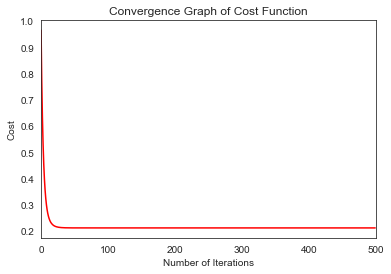

In [600]:
np.random.seed(123)
iterations = 500
lr = 0.2

initial_cost = cost(x_train_exp4, y_train_exp4, theta)
print("Initial cost is: ", initial_cost, "\n")
(cost_hist, cost_theta) = gradient_descent_linear(x_train_exp4, y_train_exp4, theta, lr, iterations)
print("Optimal parameters are: \n", cost_theta, "\n")
print("Final cost is: ", cost_hist[-1])

plt.plot(range(len(cost_hist)), cost_hist, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.xlim([0,500])
plt.show()

In [601]:
cost_hist[499]

array([0.21186225])

In [602]:
final_pred_linear_test_exp4 = pred(x_test_exp4, cost_theta)

In [603]:
result(y_test_exp4, final_pred_linear_test_exp4)

R2 of the model:  0.39368909526156015
Mean absolute error:  0.47794087375314775
Mean squared error:  0.6063109047384398
Root mean squared error:  0.7786596848035988


In [604]:
final_pred_linear_train_exp4 = pred(x_train_exp4, cost_theta)

In [605]:
result(y_train_exp4, final_pred_linear_train_exp4)

R2 of the model:  0.394679292882948
Mean absolute error:  0.47522304922326225
Mean squared error:  0.6053207071170521
Root mean squared error:  0.7780235903345426


## Logistic Regression

In [606]:
df_exp4 = df.drop(columns = ['MDIMA', 'NDIMB', 'STRM', 'STRN', 'KWG', 'KWI'])
#df_exp4.shape
df_exp4 = df_exp4.iloc[:, 0:9]
df_exp4 = np.array(df_exp4)

In [607]:
x_train_log_exp4, x_test_log_exp4, y_train_log_exp4, y_test_log_exp4 = train_test_split(df_exp4, df['Avg_run'], test_size = 0.3)
x_train_log_exp4.shape, x_test_log_exp4.shape, y_train_log_exp4.shape, y_test_log_exp4.shape

((169120, 9), (72480, 9), (169120,), (72480,))

In [608]:
y_train_log_exp4 = np.array(y_train_log_exp4).reshape(-1,1)
y_test_log_exp4 = np.array(y_test_log_exp4).reshape(-1,1)

In [609]:
x_train_log_exp4 = standardization(x_train_log_exp4)
x_test_log_exp4 = standardization(x_test_log_exp4)

In [610]:
np.random.seed(123)
n = np.size(x_train_log_exp4,1)
theta_log = np.random.rand(n,1)

Initial Cost is: [[0.90025473]] 

Optimal Parameters are: 
 [[ 1.28491306]
 [ 0.81530177]
 [-0.87218541]
 [-0.73755672]
 [-0.06053945]
 [-0.11896549]
 [-0.39416188]
 [-0.08111352]
 [ 0.4809319 ]] 



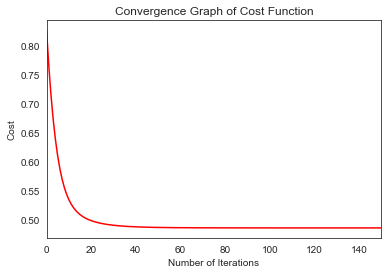

In [611]:
np.random.seed(123)
iterations = 200
learning_rate = 0.7

initial_cost = cost_log(x_train_log_exp4, y_train_log_exp4, theta_log)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, theta_optimal) = gradient_descent(x_train_log_exp4, y_train_log_exp4, theta_log, learning_rate, iterations)

print("Optimal Parameters are: \n", theta_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.xlim([0,150])
plt.show()

In [612]:
cost_history[199]

array([0.48604623])

In [613]:
final_pred_log_test_exp4 = predict(x_test_log_exp4, theta_optimal)

In [614]:
final_pred_log_train_exp4 = predict(x_train_log_exp4, theta_optimal)

In [615]:
confusionmatrix_log_test_exp4 = confusion_matrix(y_test_log_exp4, final_pred_log_test_exp4)
print(confusionmatrix_log_test_exp4)

[[29102  7069]
 [ 6860 29449]]


In [616]:
confusionmatrix_log_train_exp4 = confusion_matrix(y_train_log_exp4, final_pred_log_train_exp4)
print(confusionmatrix_log_train_exp4)

[[68469 16159]
 [15975 68517]]


In [617]:
accuracy(y_train_log_exp4, final_pred_log_train_exp4)

0.8099929044465468

In [618]:
accuracy(y_test_log_exp4, final_pred_log_test_exp4)

0.8078228476821192